# PRIVATE INVESTMENT IN EDUCATION
# Model Ben-Porath (1967)

> **Note the following:** 
> 1. This is *not* meant to be an example of an actual **model analysis project**, just an example of how to structure such a project.
> 1. Remember the general advice on structuring and commenting your code
> 1. The `modelproject.py` file includes a function which could be used multiple times in this notebook.

Imports and set magics:

In [280]:
import numpy as np
from scipy import optimize
import sympy as sm
import matplotlib.pyplot as plt
import pandas as pd

# Added by Rodrigo
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import ipywidgets as widgets
from IPython.display import display
import plotly.graph_objects as go

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
from modelproject import HumanCapitalModelClass

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Model description

**Write out the model in equations here.** 

The model presented by Yed Ben-Porath in 1967 (1) applies theory from capital investment models to study the decision to invest in education in the life-cycle (here two periods). This model treats education is an investment because the individuals need time/resources to invest in it, there are uncertain future returns, and there is depreciation from losing abilities or abilities that start to be obsolete.

The model presents a representative individual whose chooses how much time to invest in education (form 0 to 1) in time t and time t+1, and how much invest in labor market, with the aim of maximizing his utility (life-time utility). Education increases human capital which increases the wages won at the labor market, and the individual is impatience ($\rho$).

The life time utility is:

$$
V =  U_t - C_t + (\frac{1}{1+\rho})[U_{t+1} - C_{t+1}]
$$

Where $U_t$ and $U_{t+1}$ are the utility from study, which is equal to the benefits of studing, i.e. the wage received at labor market which is the return of human capital; this return depends on how much labor market values human capital ($\beta_t$ and $\beta_{t+1}$). Hence, $U_t = \beta_t * H_t$ and $U_{t+1} = \beta_{t+1} * H_{t+1}$.

$C_t$ and $C_{t+1}$ are the cost of studying. These costs come from the direct cost of school such as fees ($\gamma$), which is the same for all individuals, plus the opportunity cost of studying because of not working for a wage. Hence, $C_t= (\gamma * S_t) + (S_t * \beta_t * H_t)$, and $C_{t+1}= (\gamma * S_{t+1}) + (S_{t+1} * \beta_{t+1} * H_{t+1})$

Finally, the human capital acummulation formula is:

$$
H_{t+1}=H_t (1-\delta) + (A*E_t*S_t*H_t)^\alpha
$$

This equation represents a positive relationship between $H_{t+1}$ and $H_t$, which is concave ($\alpha < 1$), meaning a decreasing human capital production. In addition, we have $A$ which is exogeneous initial level of ability, $E_t$ which is the level of government investment in education, $S_t$ is the level of education, and $H_t$ is the previous human capital level.

Including all these equations (utility, cost and human capital accumuation), we have the following final life-utility function.

$$
V = (1-S_t) * \beta_t * H_t  - \gamma * S_t  + (\frac{1}{1+\rho})[(1-S_{t+1})\beta_{t+1} * (H_t (1-\delta) + (A*E_t*S_t*H_t)^\alpha) - \gamma * S_{t+1}]
$$

From this equation, the indidivual chooses $S_t$ and $S_{t+1}$, which have to be between 0 and 1.

## Analytical solution

The model has an analytical solucion:

$$
S_t^* = [\frac{\beta_{t+1}}{\beta_t} * \frac{\alpha}{1+\rho} * \frac{1}{H_t+\gamma/\beta_t} * (A H_t E_t)^\alpha * (1-S_{t+1})]^\frac{1}{1-\alpha}
$$

If your model allows for an analytical solution, you should provide here.

You may use Sympy for this. Then you can characterize the solution as a function of a parameter of the model.

To characterize the solution, first derive a steady state equation as a function of a parameter using Sympy.solve and then turn it into a python function by Sympy.lambdify. See the lecture notes for details. 

## Numerical solution

You can always solve a model numerically. 

Define first the set of parameters you need. 

Then choose one of the optimization algorithms that we have gone through in the lectures based on what you think is most fitting for your model.

Are there any problems with convergence? Does the model converge for all starting values? Make a lot of testing to figure these things out. 

In [281]:
model = HumanCapitalModelClass()

#Numerical solution of the model
solution = model.solve_discrete()

print(solution)



namespace(S0=0.020833333333333332, S1=0.0, v=1.0394919288266367)


In [282]:
### Continuous solution
model = HumanCapitalModelClass()
model.solve_discrete()



namespace(S0=0.020833333333333332, S1=0.0, v=1.0394919288266367)

***Countinuous solution***

Solving the model with the SLSQP method. The method minimizes a function with several variables with combinations of bounds. Thus, what is needed for this method is the bounds set and an initial guess for the variables.

In [283]:
model.solve_continously()

namespace(S0=0.027545974235442378, S1=0.0, v=1.040212110550439)

**Interpretation**
The utility will be optimized when $S_t$ is 0.0275 and $S_{t+1}$ is 0. Thus, they will use 2.75 percent of their day on schooling. Meaning that with:

* $A$: initial ability = 1.0
* $E$: public expenditure in schooling = 1.0
* $H_t$: human capital at time $t$ = 1.0
* $\beta_t$ = $\beta_{t+1}$: present and future wages are equal = 0.5
* $\rho$: discount factor = 0.0025
* $\gamma$: direct cost of education = 1.0
* $\delta$: human capital does not depreciate over time = 0.0.
* $\alpha$ = productivity of human capital = 0.5

The utility will be 1.04.


***

***Continuous solution with changing variables***

This section will analyze the change in utility with changes in:

* $\gamma$
* $A$
* $\beta_t$
* $E$
* $\alpha$
* $\rho$

Text(0.5, 0, 'Direct cost of education')

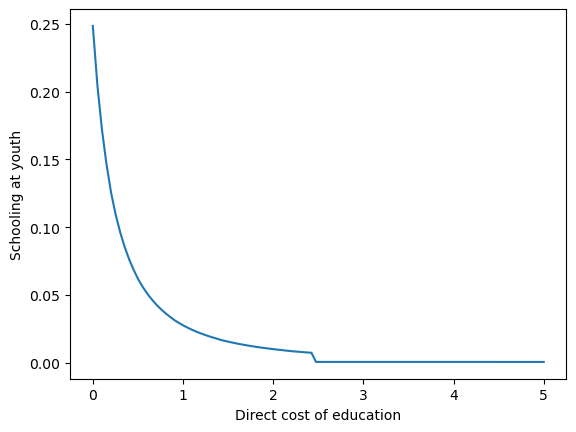

In [284]:
# Changing in direct cost of schooling (gamma)
model = HumanCapitalModelClass()

gamma_values = np.linspace(0,5, 100)
gamma0_1 = []
S0_gamma_change = []


for a, i in enumerate(gamma_values):
    model.par.gama = i
    solution=model.solve_continously()
    gamma0_1.append(i)
    S0_gamma_change.append(solution.S0)




plt.plot(gamma0_1, S0_gamma_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Direct cost of education")


**Interpretation**

With a change of $\gamma$ from 1.0 to 2.0, $S_t$ changes to 0.0994 while $S_{t+1}$ stays at 0. Utility decreases from 1.04 to 1.02.

Text(0.5, 0, 'Initial ability')

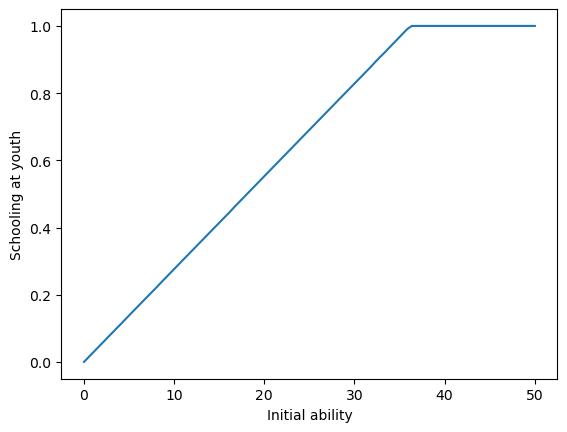

In [285]:
#Changing in ability (A)
model = HumanCapitalModelClass()

A_values = np.linspace(0,50, 100)
A0_1 = []
S0_A_change = []


for a, i in enumerate(A_values):
    model.par.A = i
    solution=model.solve_continously()
    A0_1.append(i)
    S0_A_change.append(solution.S0)




plt.plot(A0_1, S0_A_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Initial ability")


Text(0.5, 0, 'Present wage')

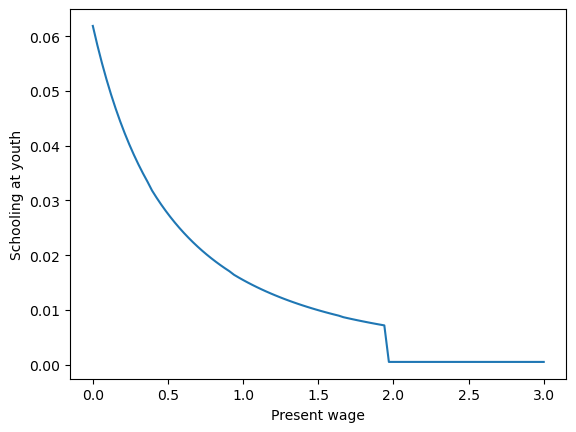

In [286]:
#Changing in present wage (b0)
model = HumanCapitalModelClass()

b0_values = np.linspace(0,3, 100)
b0_1 = []
S0_b0_change = []


for a, i in enumerate(b0_values):
    model.par.B0 = i
    solution=model.solve_continously()
    b0_1.append(i)
    S0_b0_change.append(solution.S0)




plt.plot(b0_1, S0_b0_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Present wage")

Text(0.5, 0, 'Public expenditure in schooling')

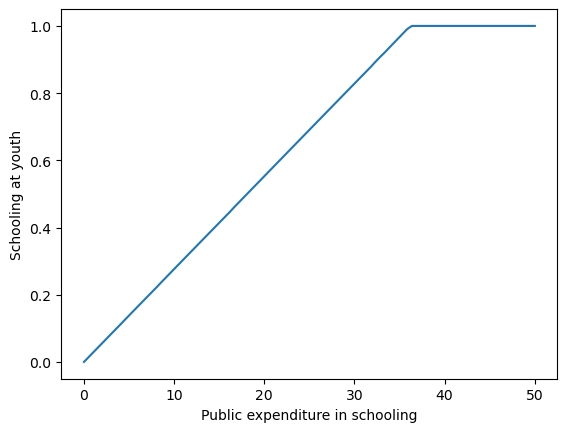

In [287]:
#Changing in public expenditure of schooling (E)
model = HumanCapitalModelClass()

E_values = np.linspace(0,50, 100)
E0_1 = []
S0_E_change = []


for a, i in enumerate(E_values):
    model.par.E = i
    solution=model.solve_continously()
    E0_1.append(i)
    S0_E_change.append(solution.S0)




plt.plot(E0_1, S0_E_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Public expenditure in schooling")

Text(0.5, 0, 'Productivity of human capital')

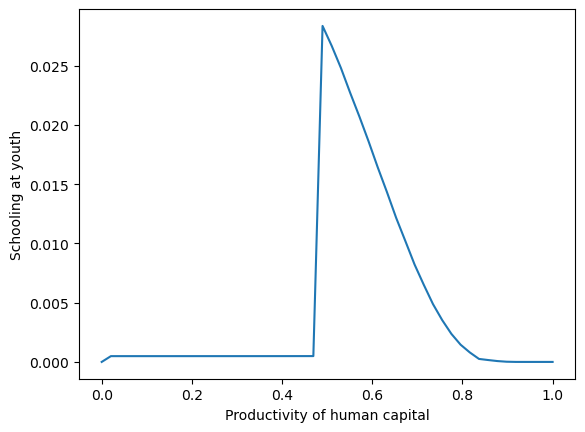

In [288]:
#Changing in productivity of human capital (alpha)
model = HumanCapitalModelClass()

alpha_values = np.linspace(0,1, 50)
alpha0_1 = []
S0_alpha_change = []


for a, i in enumerate(alpha_values):
    model.par.alpha = i
    solution=model.solve_continously()
    alpha0_1.append(i)
    S0_alpha_change.append(solution.S0)




plt.plot(alpha0_1, S0_alpha_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Productivity of human capital")


Text(0.5, 0, 'Discount factor')

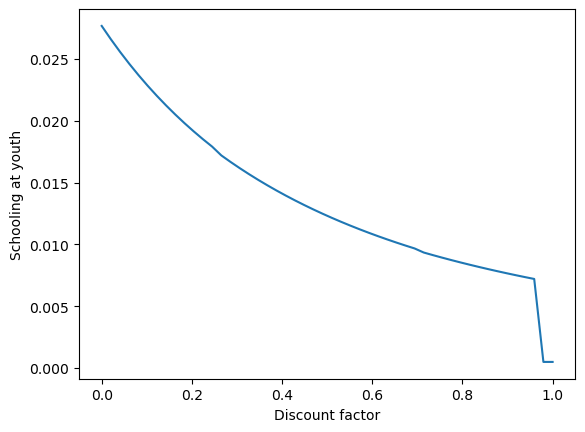

In [289]:
#Changing in discount factor (rho)
model = HumanCapitalModelClass()

rho_values = np.linspace(0,1, 50)
rho0_1 = []
S0_rho_change = []


for a, i in enumerate(alpha_values):
    model.par.rho = i
    solution=model.solve_continously()
    rho0_1.append(i)
    S0_rho_change.append(solution.S0)




plt.plot(rho0_1, S0_rho_change)
plt.ylabel("Schooling at youth")
plt.xlabel("Discount factor")

In [290]:
### Rodrigo
#At discret solution, substitute the print for all of this:   
legend = "The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:"

print(legend)
print("S0: {:.4f}".format(solution.S0))
print("S1: {:.4f}".format(solution.S1))
print("V: {:.4f}".format(solution.v))

The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:
S0: 0.0005
S1: 0.0000
V: 0.7548


In [291]:
#same with the continous solution:  
legend = "The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:"
solution_con = model.solve_continously()

print(legend)
print("S0: {:.4f}".format(solution_con.S0))
print("S1: {:.4f}".format(solution_con.S1))
print("V: {:.4f}".format(solution_con.v))

The ratio of time that the representative individual decides to invest in studying during the periods of youth (S0) and adulthood (S1) with an utility level (U) is as follows:
S0: 0.0005
S1: 0.0000
V: 0.7548


# Further analysis

Make detailed vizualizations of how your model changes with parameter values. 

Try to make an extension of the model. 

**Cross Effects**

Next, we evaluate the effects that changes in the following parameters generate on the decision of Invested Time in Schooling $S_{it}$:

*i)* Labour Market Reward of Human Capital. $\beta_t$

*ii)* Direct Cost of Education. $\gamma_t * S_{it}$

*iii)* Government Expenditure on Education $E_{it}$

For individuals with different Unobservable Ability $A_i$.

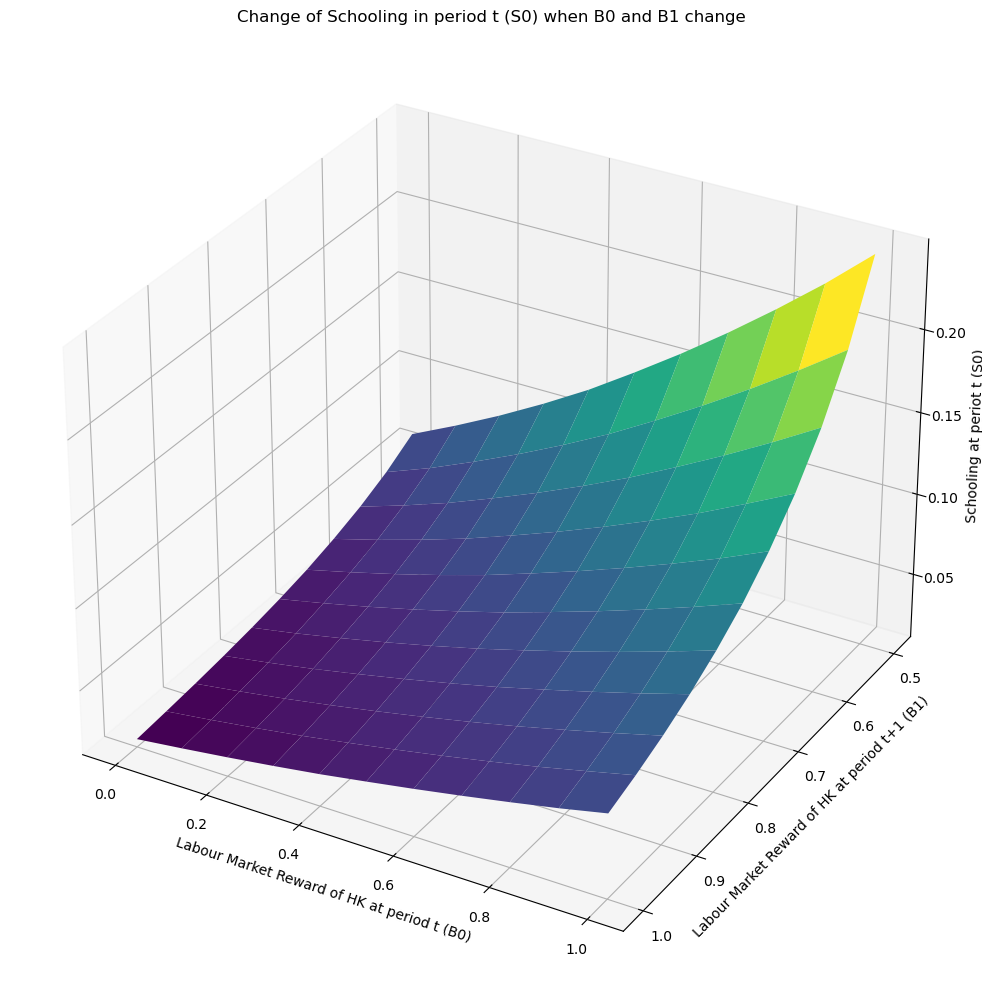

In [292]:
# Defining the range of the parameters

As = np.array([1,3]) # Two individuals with different initial Unobservable Ability
B0s = np.linspace(0,1,11) # Changes in the Labour Market Reward of HK in period t
B1s = np.linspace(0.5,1,11) # Changes in the Labour Market Reward of HK in period t+1
Es = np.linspace(1,5,9) # Increasing of Public Expenditure on Education per person
gammas = np.linspace(1,5,9) # Increasing in Direct Cost of Education

sol_b_c = np.zeros((len(B0s), len(B1s), len(As)))

model = HumanCapitalModelClass()

for i, B0 in enumerate(B0s):
    for j, B1 in enumerate(B1s):
        model.par.B0 = B0
        model.par.B1 = B1
        solution = model.solve_continously()
        sol_b_c[i, j, :] = solution.S0

X, Y = np.meshgrid(B0s, B1s)

fig = plt.figure(figsize=(12.5, 12.5))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, sol_b_c[:,:,0], cmap='viridis')
ax.set_xlabel('Labour Market Reward of HK at period t (B0)')
ax.set_ylabel('Labour Market Reward of HK at period t+1 (B1)')
ax.set_zlabel('Schooling at periot t (S0)')
ax.set_title('Change of Schooling in period t (S0) when B0 and B1 change')
ax.invert_yaxis()

plt.show()

# Conclusion

Add concise conclusion. 